In [2]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
from datetime import datetime
from pandas_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plot we will create


In [3]:
#Read the spotify data
spotify_df = pd.read_csv(("..\\Raw Data\\Onyx Data - DataDNA Dataset Challenge - July 2021 - Spotify Tracks.csv"))

In [4]:
#To create a simple report quickly
profile = ProfileReport(spotify_df,title = 'Pandas Profiling Report',explorative =True)
profile.to_file("spotify-output.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

C:\Users\panig\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# check the data set
spotify_df.head

<bound method NDFrame.head of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903        

In [6]:
# Find out the missing data
for col in spotify_df.columns:
     pct_missing = np.mean(spotify_df[col].isnull())
     print('{} -{}%'.format(col,pct_missing))
    

id -0.0%
name -0.00012102162707611749%
popularity -0.0%
duration_ms -0.0%
explicit -0.0%
artists -0.0%
id_artists -0.0%
release_date -0.0%
danceability -0.0%
energy -0.0%
key -0.0%
loudness -0.0%
mode -0.0%
speechiness -0.0%
acousticness -0.0%
instrumentalness -0.0%
liveness -0.0%
valence -0.0%
tempo -0.0%
time_signature -0.0%


In [7]:
# Deleting Null value rows

new_df = spotify_df.dropna()

In [8]:
#for col in new_df.columns:
#     pct_missing = np.mean(new_df[col].isnull())
#     print('{} -{}%'.format(col,pct_missing))

In [9]:
# Data types for columns
new_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [10]:
new_df['duration_m'] = new_df['duration_ms']/60000
#new_df = new_df.reindex(sorted(new_df.columns),axis = 1)

<ipython-input-10-ee1d27d8be20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['duration_m'] = new_df['duration_ms']/60000


In [11]:
new_df


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_m
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,2.115050
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1.636667
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,3.027333
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,2.948450
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,2.718000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,4.304450
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2.554883
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.126683
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.366717


In [12]:
new_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_m          float64
dtype: object

In [13]:
#Clean the artists column, Deleting the [], and ''
valuesToClean = ["[", "]", "'"]

for v in valuesToClean:
    new_df['artists'] = new_df['artists'].str.replace(v, '', regex=True)


<ipython-input-13-196e8aab708a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['artists'] = new_df['artists'].str.replace(v, '', regex=True)


In [14]:
print(new_df.head())

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit          artists                  id_artists  \
0       126903         0              Uli  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  Fernando Pessoa  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  Ignacio Corsini  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  Ignacio Corsini  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      Dick Haymes  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  loudness  mode  speechiness  \
0   1922-02-22    

#The release_date column contains the date on which the song was released but the it seems to be inconsistent. 
#In many entries the column only contains the year of release. 
#To keep the data consistent we will add a new column named Year containing only the release year of the song

In [15]:
#def to_year(x):
#    result = []
#    x.to_string()
#    for i in x:
#        result.append(int(i[ :4]))
 #   return result

#new_df['year'] = to_year(new_df.release_date)
new_df['release_year'] = pd.DatetimeIndex(new_df['release_date']).year


<ipython-input-15-44798adc58a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_year'] = pd.DatetimeIndex(new_df['release_date']).year


In [16]:
new_df
#new_df.isnull().sum()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_m,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,2.115050,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1.636667,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,3.027333,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,2.948450,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,2.718000,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,4.304450,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2.554883,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.126683,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.366717,2021


The new_df dataframe has 21 columns. We will use the following columns.
'name','popularity','duration_m','explicit','release_year', and audio features of the track danceability','energy',
'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo'
We have selected a total of 15 columns. Let's drop the other columns

In [17]:
to_drop =['id', 'id_artists','release_date' ,'mode','time_signature','duration_ms' ]

In [18]:
 new_df.drop(to_drop,axis = 1, inplace = True)

C:\Users\panig\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
new_df.info()
new_df.head(4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586601 non-null  int64  
 2   explicit          586601 non-null  int64  
 3   artists           586601 non-null  object 
 4   danceability      586601 non-null  float64
 5   energy            586601 non-null  float64
 6   key               586601 non-null  int64  
 7   loudness          586601 non-null  float64
 8   speechiness       586601 non-null  float64
 9   acousticness      586601 non-null  float64
 10  instrumentalness  586601 non-null  float64
 11  liveness          586601 non-null  float64
 12  valence           586601 non-null  float64
 13  tempo             586601 non-null  float64
 14  duration_m        586601 non-null  float64
 15  release_year      586601 non-null  int64  
dtypes: float64(10), int6

,name,popularity,explicit,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_m,release_year
0,Carve,6,0,Uli,0.645,0.4450,0,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,2.115050,1922
1,Capítulo 2.16 - Banquero Anarquista,0,0,Fernando Pessoa,0.695,0.2630,0,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1.636667,1922
2,Vivo para Quererte - Remasterizado,0,0,Ignacio Corsini,0.434,0.1770,1,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,3.027333,1922
3,El Prisionero - Remasterizado,0,0,Ignacio Corsini,0.321,0.0946,7,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,2.948450,1922


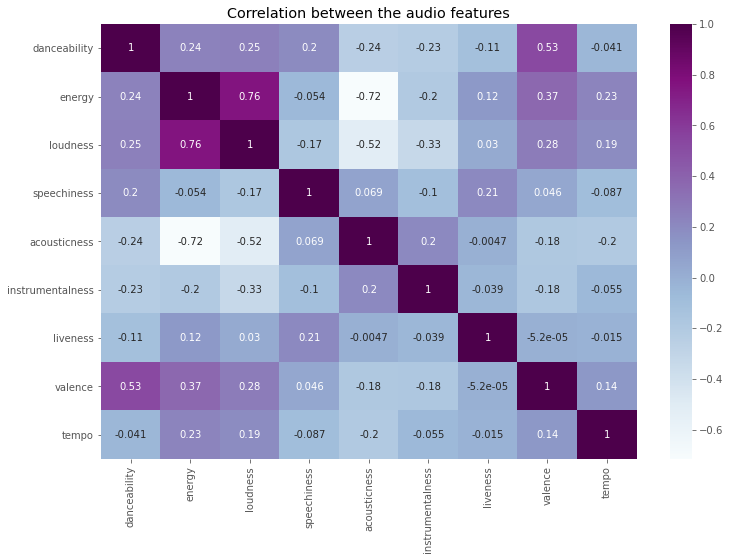

In [20]:
corr = new_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True,cmap ='BuPu');

The following observations can be made from the above heatmap:

There is a strong positive correlation between energy and loudness.
Also there is a positive correlation between valence and danceablity.
There seems to be strong negative correlation between acousticness and energy.

In [20]:
#save the data to a csv_file.
new_df.to_csv("..\\Raw Data\\Final_Spotify_Tracks.csv",index = False)
